In [102]:
import pandas as pd
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC_PR
import numpy as np
import matplotlib.pyplot as plt

# Pretreatment

## Visualisation des données

In [103]:
df = pd.read_csv("diabetes_dataset.csv")
df.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


In [104]:
df.dtypes

Age                     int64
Pregnancies             int64
BMI                   float64
Glucose               float64
BloodPressure         float64
HbA1c                 float64
LDL                   float64
HDL                   float64
Triglycerides         float64
WaistCircumference    float64
HipCircumference      float64
WHR                   float64
FamilyHistory           int64
DietType                int64
Hypertension            int64
MedicationUse           int64
Outcome                 int64
dtype: object

In [105]:
df.isnull().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

Colonnes à discrétiser

In [106]:
discret = df.columns[2:12]
discret

Index(['BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL',
       'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR'],
      dtype='object')

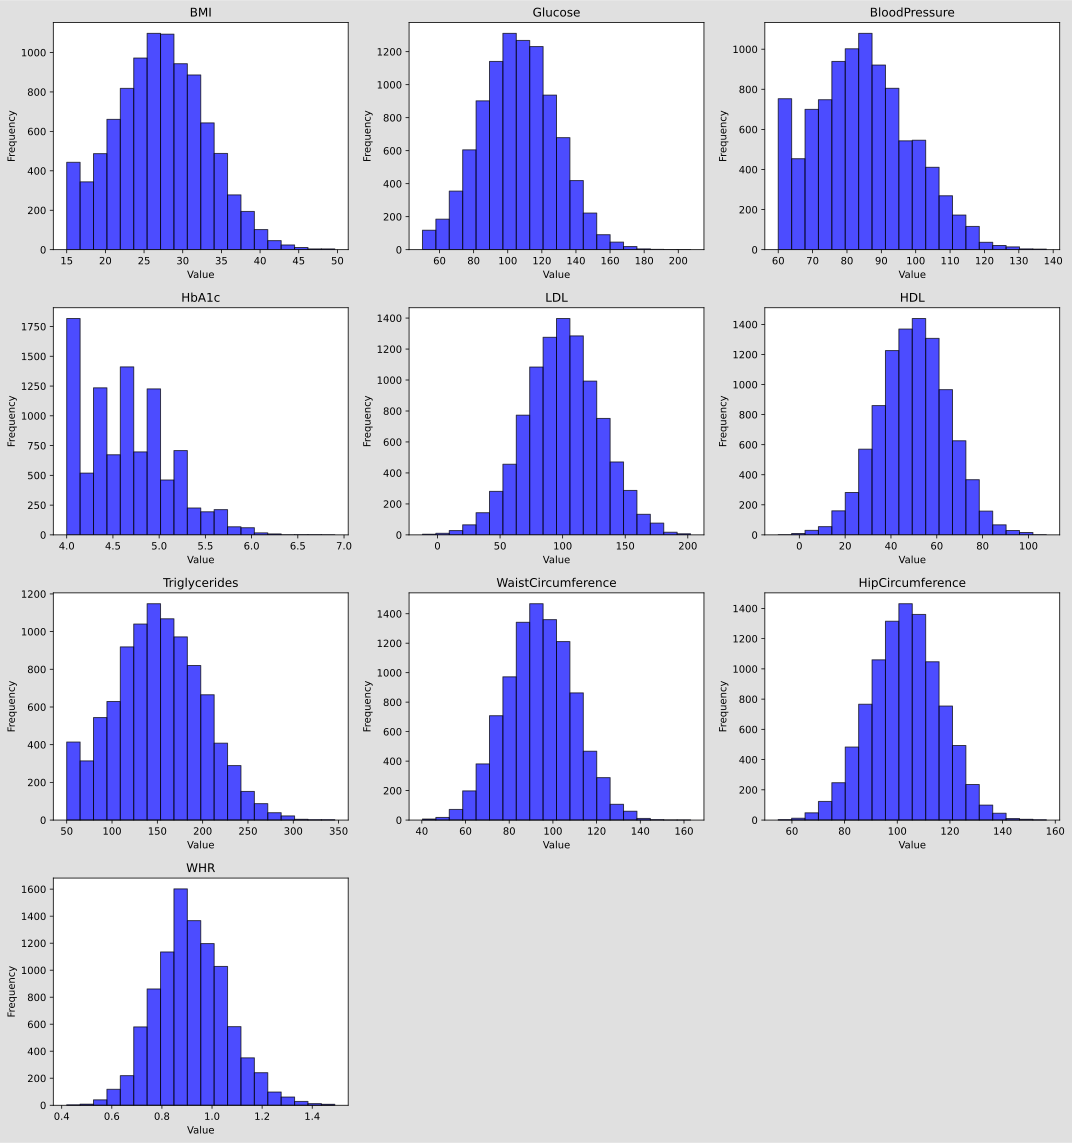

In [107]:
num_cols = discret
num_vars = len(num_cols)

cols_per_row = 3
num_rows = int(np.ceil(num_vars / cols_per_row))  

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.hist(df[col].dropna(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

    plt.tight_layout()
plt.show()

## Discrétisation des colonnes

In [108]:
def age_discret(age):

    if(age < 12):
        return 0
    if(age < 18):
        return 1
    if(age < 35):
        return 2
    if(age < 65):
        return 3
    if(age <72):
        return 4
    else:
        return 5

In [109]:
def pregnancies_discret(preg):
    if preg < 4:
        return 0
    if preg < 7:
        return 1
    if preg < 11:
        return 2
    return 3

In [110]:
df.Age = df.Age.apply(age_discret)
df.Pregnancies = df.Pregnancies.apply(pregnancies_discret)


### Variables normalement distribuées

In [111]:
def discretize_column(df, column):

    med = df[column].median()
    std = df[column].std()
    
    bins = [-np.inf, med - 1.5*std, med - 0.5*std, med + 0.5*std, med + 1.5*std, np.inf]
    
    labels = [-2, -1, 0, 1, 2]
    
    return pd.cut(df[column], bins=bins, labels=labels)
    

In [112]:
for col in discret:
    df[col] = discretize_column(df, col)

df

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,4,1,0,1,0,2,1,0,-2,0,0,0,0,0,0,1,0
1,2,0,0,0,-1,0,0,0,0,1,-2,2,0,0,0,0,0
2,5,3,0,0,0,1,0,0,1,-1,0,-1,0,0,0,1,0
3,5,3,0,2,1,2,-2,-1,-1,1,1,1,0,0,0,1,1
4,3,2,0,0,-1,0,0,-1,0,-1,-1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,2,0,-1,0,-2,-1,0,0,-2,0,1,-1,0,0,0,0,0
9534,5,0,0,1,1,1,0,1,-1,0,-1,0,1,0,0,1,1
9535,5,1,0,0,-1,1,2,1,0,-1,1,-1,0,0,0,1,0
9536,3,0,0,0,1,0,-1,0,-1,0,-1,1,1,0,0,0,1


In [113]:
df.to_csv("diabetes_dataset_post.csv")

In [114]:
train, test = df.iloc[:int(len(df)*0.8)], df.iloc[int(len(df)*0.8):]

# Apprentissage 

In [115]:
template = gum.BayesNet()
for col in df.columns:
    template.add(gum.RangeVariable(col,col,int(np.min(df[col])), int(np.max(df[col]))))

template

(pyAgrum.BayesNet@0x6338bfbfc7e0) BN{nodes: 17, arcs: 0, domainSize: 10^9.77815, dim: 51, mem: 544o}

In [116]:
learner = gum.BNLearner(train, template)
bn = learner.learnBN()
bn

(pyAgrum.BayesNet@0x6338c01f7960) BN{nodes: 17, arcs: 12, domainSize: 10^9.77815, dim: 299, mem: 3Ko 40o}

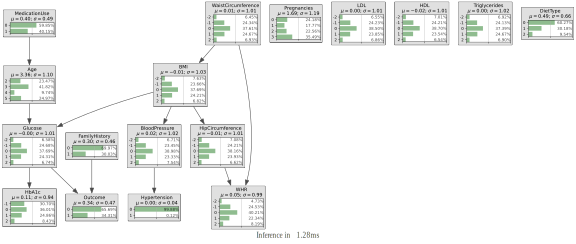

In [117]:
gnb.showInference(bn)

In [118]:
bn.cpt("Outcome")

(pyAgrum.Potential@0x6338c0116670) 
             ||  Outcome          |
Family|Glucos||0        |1        |
------|------||---------|---------|
0     |-2    || 0.9999  | 0.0001  |
1     |-2    || 0.0003  | 0.9997  |
0     |-1    || 1.0000  | 0.0000  |
1     |-1    || 0.0001  | 0.9999  |
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.0001  | 0.9999  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 0.0001  | 0.9999  |
0     |2     || 0.0918  | 0.9082  |
1     |2     || 0.0003  | 0.9997  |

In [119]:
gum.MarkovBlanket(bn,'Outcome')

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x762d95466070> >

dataframe: 100%|██████████|


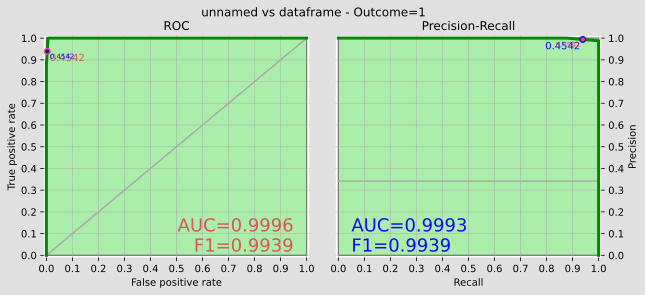

In [127]:
showROC_PR(bn, train,"Outcome", 1, show_fig=True)

In [123]:
def init_belief(engine):
    # Initialize evidence
    for var in engine.BN().names():
        if var != 'Survived':
            engine.addEvidence(var, 0)

def update_beliefs(engine, bayesNet, row):
    # Update beliefs from a given row less the Survived variable
    for var in bayesNet.names():
        if var == "Survived":
            continue
        try:
            label = str(row.to_dict()[var])
            idx = bayesNet.variable(var).index(str(row.to_dict()[var]))
            engine.chgEvidence(var, idx)
        except gum.NotFound:
            # this can happen when value is missing is the test base.
            pass        
    engine.makeInference()
    
def is_well_predicted(engine, bayesNet, auc, row):
    update_beliefs(engine, bayesNet, row)
    marginal = engine.posterior('Outcome')
    outcome = row.to_dict()['Outcome']
    if outcome == 0: 
        if marginal.toarray()[1] < auc:
            return "True Positive"
        else:
            return "False Negative"
    else: 
        if marginal.toarray()[1] >= auc:
            return "True Negative"
        else:
            return "False Positive"

In [131]:
ie = gum.LazyPropagation(bn)
init_belief(ie)
ie.addTarget("Outcome")

print("Train")
result = train.apply(lambda x: is_well_predicted(ie, bn, 0.45, x), axis=1)
print(result.value_counts(True))
positives = sum(result.map(lambda x: 1 if x.startswith("True") else 0 ))
total = result.count()
print("{0:.2f}% good predictions".format(positives/total*100))

print("Test")
result = test.apply(lambda x: is_well_predicted(ie, bn, 0.45, x), axis=1)
result.value_counts(True)
positives = sum(result.map(lambda x: 1 if x.startswith("True") else 0 ))
total = result.count()
print("{0:.2f}% good predictions".format(positives/total*100))

Train
True Positive    0.658191
True Negative    0.341809
Name: proportion, dtype: float64
100.00% good predictions
Test
100.00% good predictions
